In [ ]:
!pip install dash

# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import warnings

warnings.filterwarnings("ignore")

data = pd.read_csv('climatedata.csv')

# Display info
data.info()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 49 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   puttalam  432 non-null    float64
 1   tauu      432 non-null    float64
 2   rlus      432 non-null    float64
 3   sfcWind   432 non-null    float64
 4   rsuscs    432 non-null    float64
 5   rsus      432 non-null    float64
 6   rsdscs    432 non-null    float64
 7   prw       432 non-null    float64
 8   hurs      432 non-null    float64
 9   rtmt      432 non-null    float64
 10  ua_850    432 non-null    float64
 11  evspsbl   432 non-null    float64
 12  vas       432 non-null    float64
 13  clwvi     432 non-null    float64
 14  rsutcs    432 non-null    float64
 15  rsds      432 non-null    float64
 16  ua_500    432 non-null    float64
 17  va_850    432 non-null    float64
 18  pr        4

In [ ]:
# Check for missing values
data.isna().sum()

puttalam    0
tauu        0
rlus        0
sfcWind     0
rsuscs      0
rsus        0
rsdscs      0
prw         0
hurs        0
rtmt        0
ua_850      0
evspsbl     0
vas         0
clwvi       0
rsutcs      0
rsds        0
ua_500      0
va_850      0
pr          0
huss        0
sbl         0
zg_500      0
wap_500     0
clt         0
va_500      0
clivi       0
ta_500      0
psl         0
hfls        0
hfss        0
prc         0
ps          0
rlds        0
rldcs       0
rlut        0
rlutcs      0
rsdt        0
rsut        0
ta_850      0
tas         0
tasmax      0
tasmin      0
tauv        0
tro3_500    0
tro3_850    0
ts          0
uas         0
wap_850     0
zg_850      0
dtype: int64

In [ ]:
# Remove duplicate data
data.drop_duplicates(keep='first')

,puttalam,tauu,rlus,sfcWind,rsuscs,rsus,rsdscs,prw,hurs,rtmt,...,tas,tasmax,tasmin,tauv,tro3_500,tro3_850,ts,uas,wap_850,zg_850
0,63.3,0.152785,0.142045,0.477828,0.454995,0.497287,0.322817,0.440015,0.638365,0.298824,...,0.161409,0.135349,0.221053,0.224634,0.673354,0.863010,0.147308,0.130948,0.736840,0.739986
1,65.8,0.160138,0.264588,0.367296,0.726774,0.744863,0.662825,0.319734,0.468713,0.599960,...,0.304473,0.374378,0.241274,0.308724,0.710253,0.673910,0.286245,0.128115,0.909573,0.615100
2,101.1,0.244791,0.591772,0.126316,0.988048,0.980332,0.980188,0.177955,0.008800,0.629573,...,0.596408,0.728056,0.390637,0.452436,0.705782,0.774462,0.631751,0.235086,0.537343,0.570181
3,247.1,0.492494,0.779492,0.319731,0.857485,0.641255,0.986357,0.480825,0.305399,0.768145,...,0.760977,0.744221,0.743645,0.677382,0.514572,0.602426,0.784966,0.583027,0.433170,0.519760
4,93.7,0.659536,0.821613,0.617099,0.633129,0.734383,0.829791,0.406790,0.416917,0.681049,...,0.816336,0.836437,0.786981,0.815424,0.997094,0.698438,0.828084,0.768470,0.795436,0.402319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,0.0,0.761474,0.675384,0.748822,0.498617,0.399574,0.701835,0.895727,0.622373,0.727800,...,0.721104,0.617505,0.858190,0.863822,0.159378,0.132565,0.665484,0.846439,0.619758,0.457957
428,3.3,0.643915,0.530778,0.529512,0.834147,0.652502,0.758431,0.713523,0.717441,0.728158,...,0.608644,0.535140,0.712487,0.773052,0.277382,0.293948,0.519420,0.753359,0.569338,0.639008
429,170.0,0.391142,0.624264,0.088907,0.560345,0.380556,0.490831,0.843419,0.655242,0.482477,...,0.643970,0.555215,0.740623,0.541118,0.164281,0.222631,0.608371,0.483519,0.183966,0.617228
430,324.5,0.285861,0.523498,0.150974,0.208331,0.321285,0.161945,0.687716,0.598205,0.287433,...,0.512019,0.423856,0.596747,0.373172,0.315656,0.549702,0.513628,0.308703,0.342319,0.777190


In [ ]:
# Checking Constant Features using VarianceThreshold

from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)

#Fit and transforming on train data
data_constant = constant_filter.fit_transform(data)
print(data_constant.shape)

#Extracting all constant columns using get support function of our filter
constant_columns = [column for column in data.columns
                    if column not in data.columns[constant_filter.get_support()]]

#No. of constant columns
print(len(constant_columns))

#Constant columns names:
for column in constant_columns:
    print(column)

(432, 49)
0


In [ ]:
# Checking Quasi-Constant Features

qcons_filter = VarianceThreshold(threshold=0.01)

#Fit and transforming on train data
data_qcons = qcons_filter.fit_transform(data)
print(data_qcons.shape)

#Extracting all Quasi constant columns using get support function of our filter
qcons_columns = [column for column in data.columns
                    if column not in data.columns[qcons_filter.get_support()]]

#No. of Quasi constant columns
print(len(qcons_columns))

#Quasi Constant columns names:
for column in qcons_columns:
    print(column)

(432, 49)
0


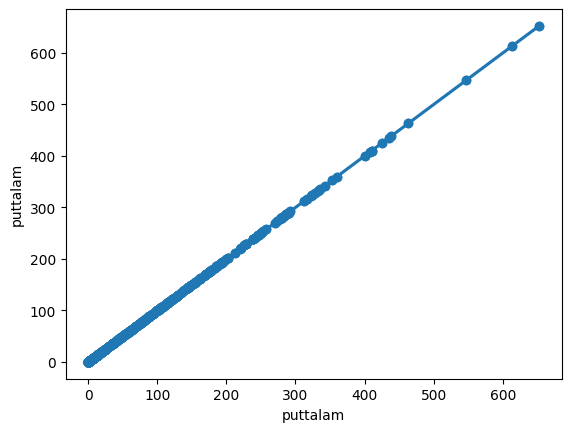

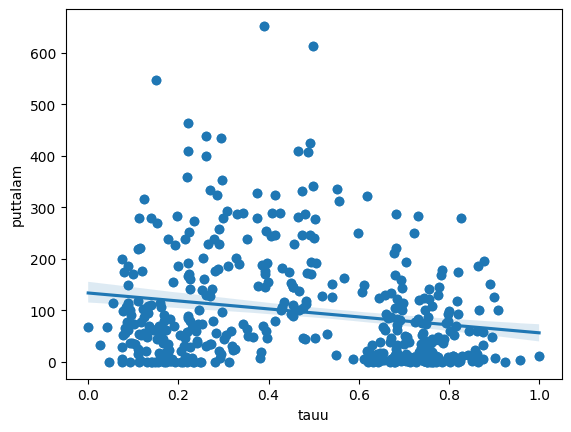

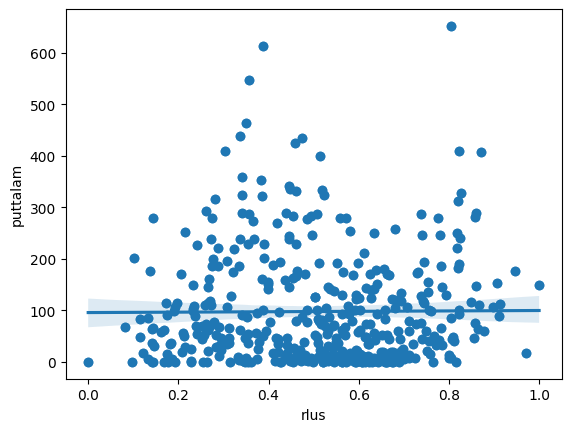

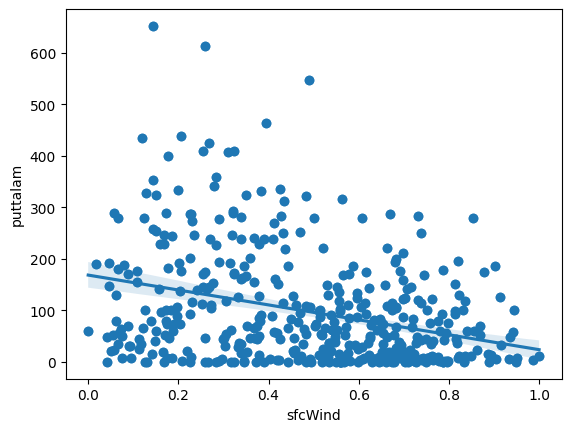

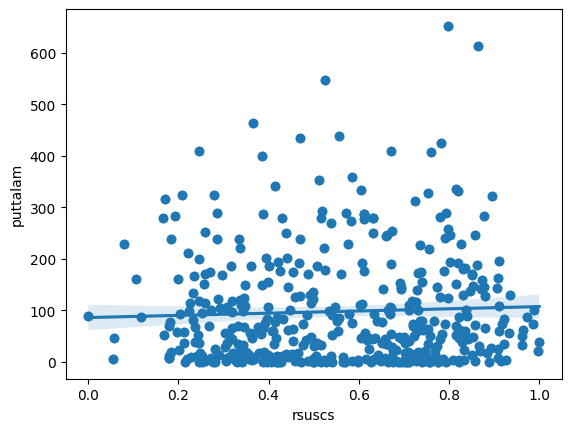

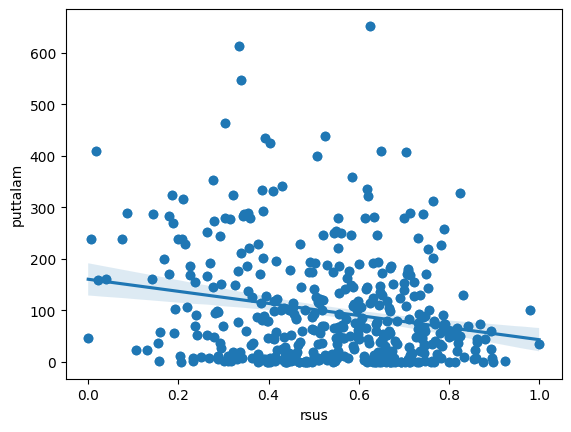

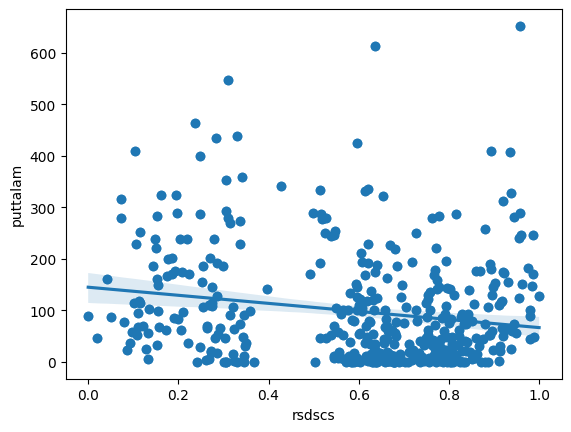

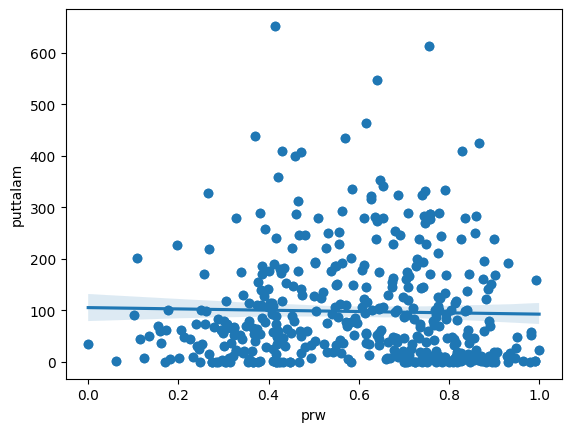

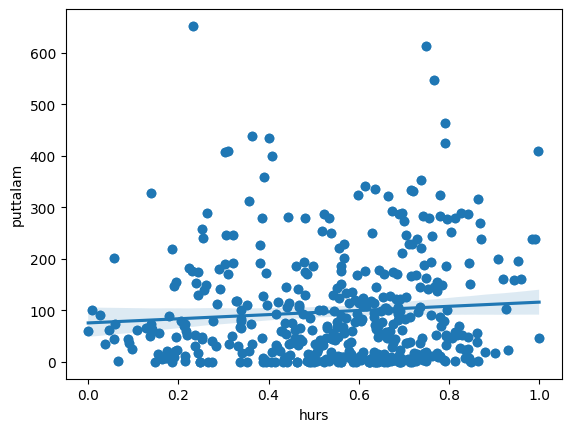

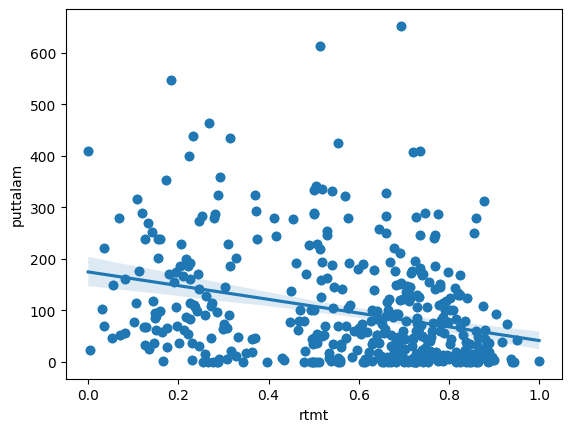

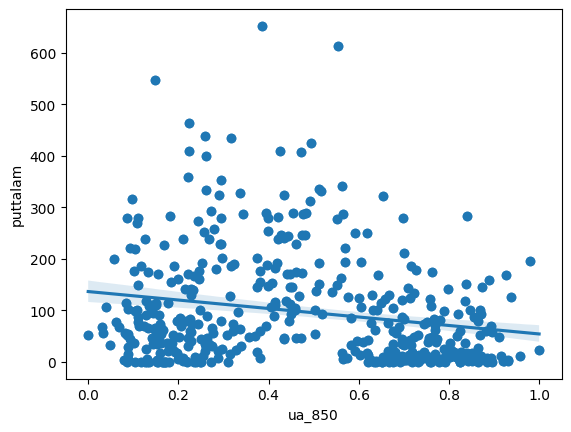

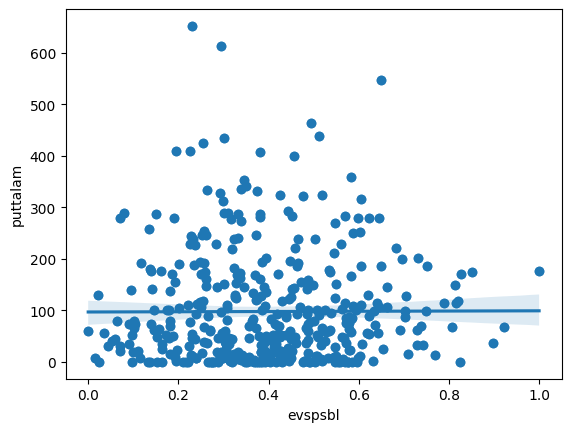

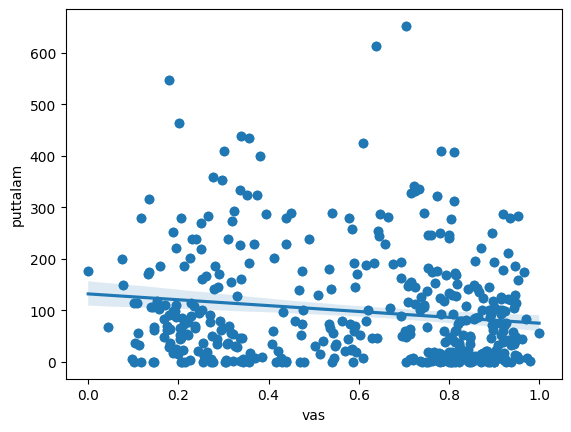

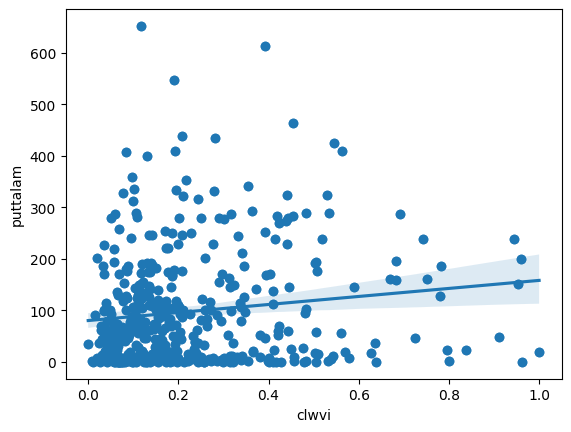

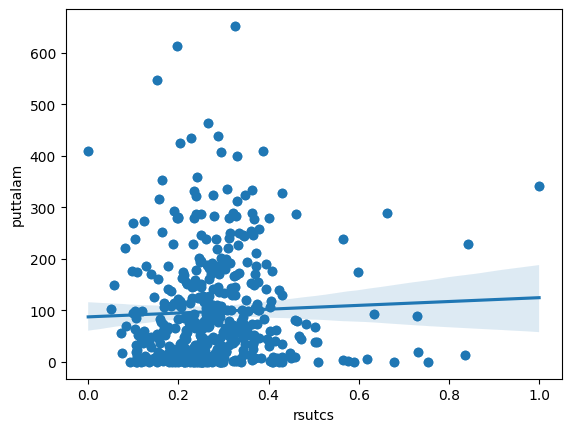

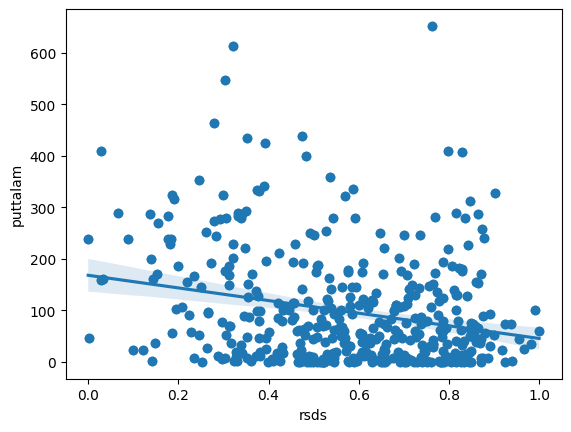

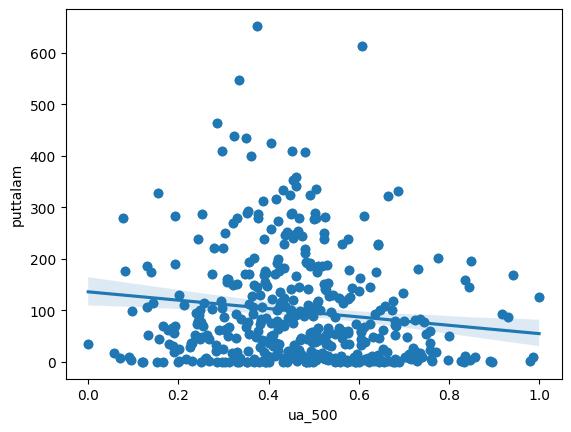

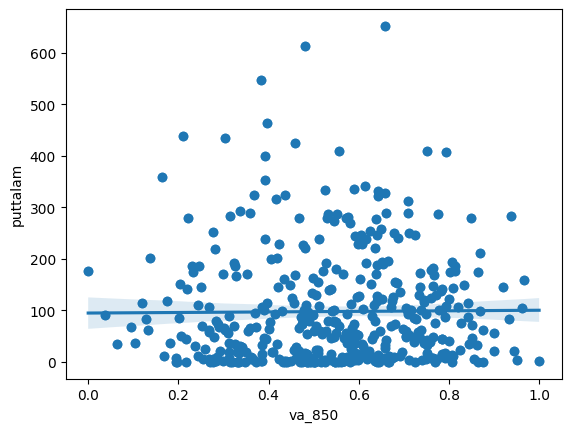

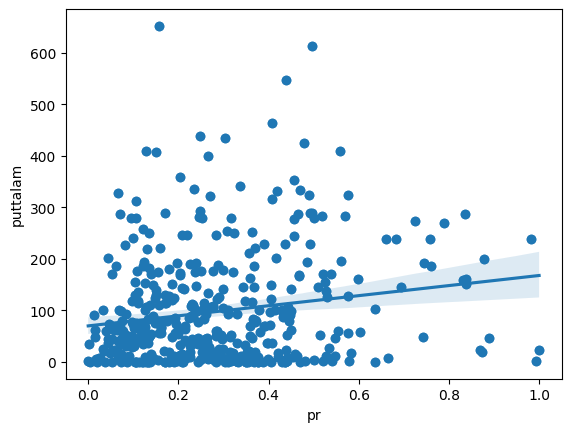

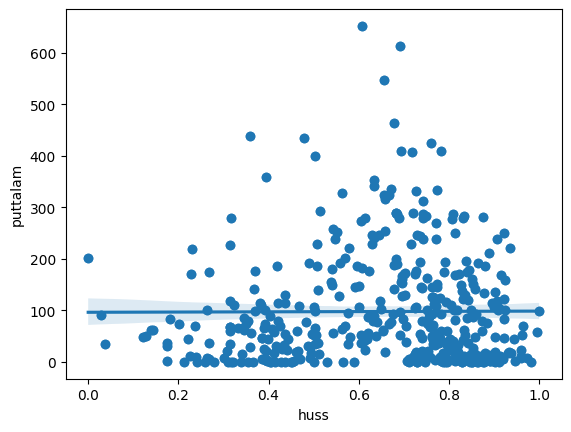

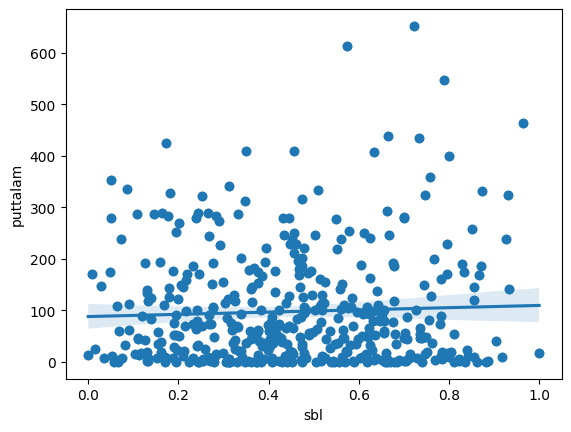

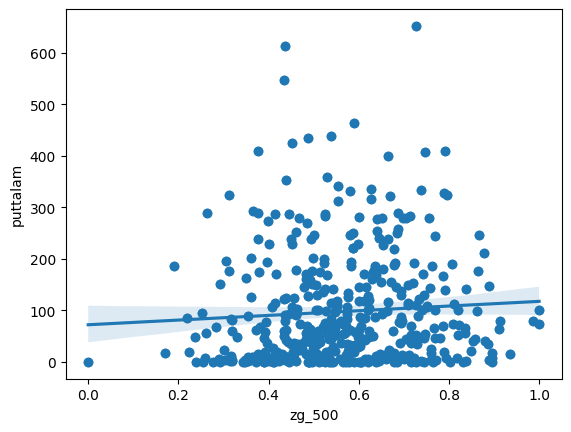

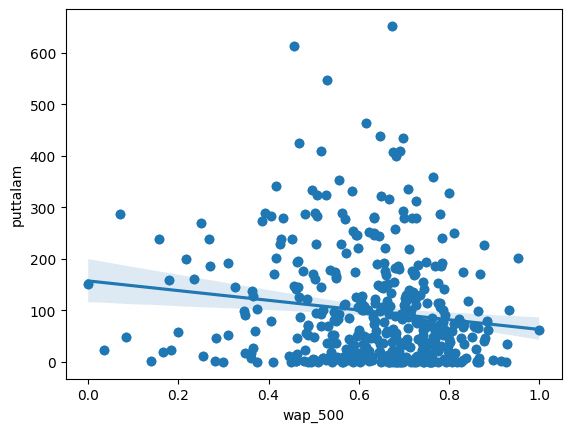

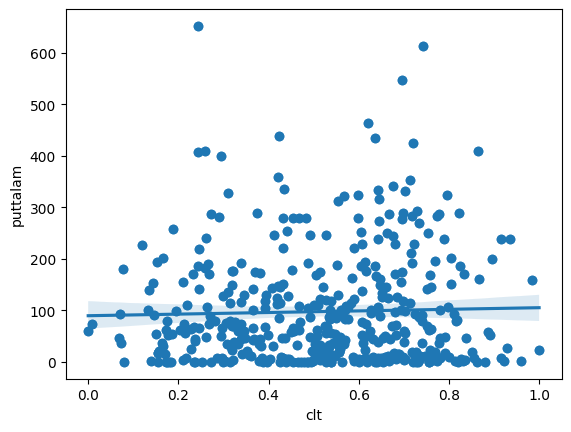

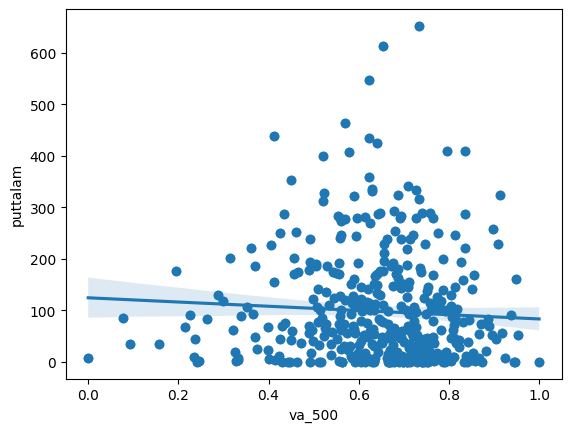

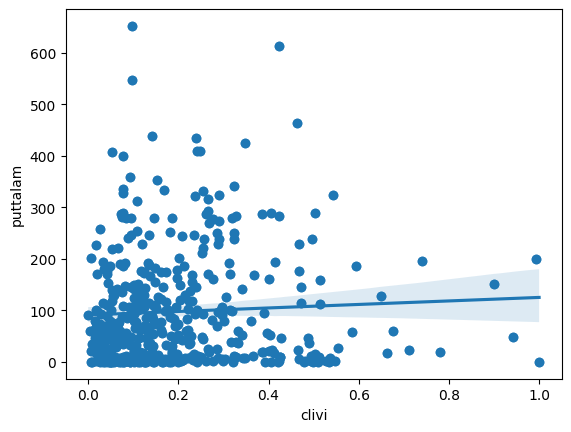

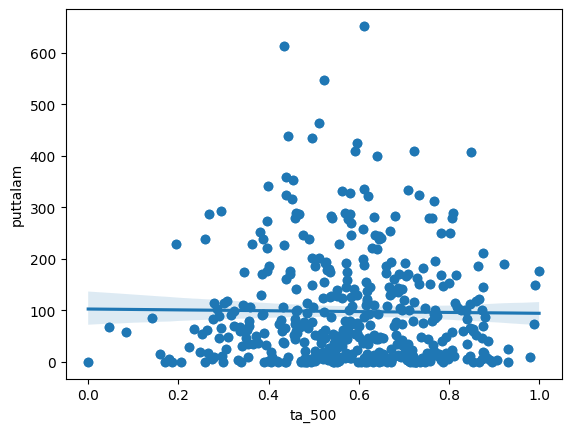

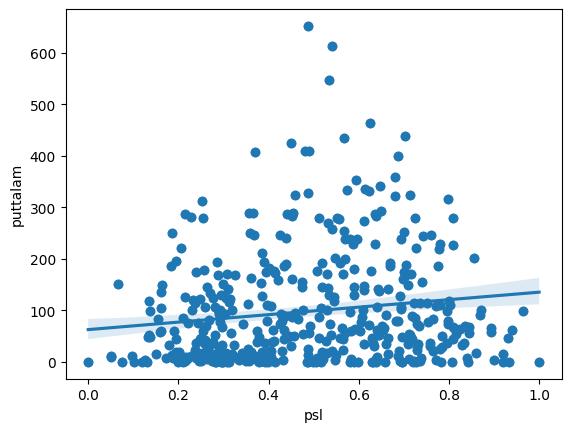

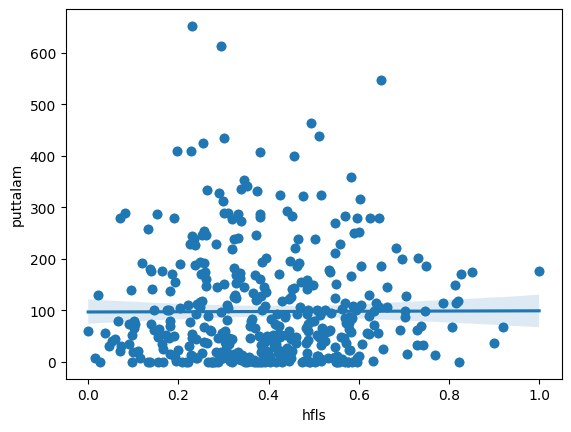

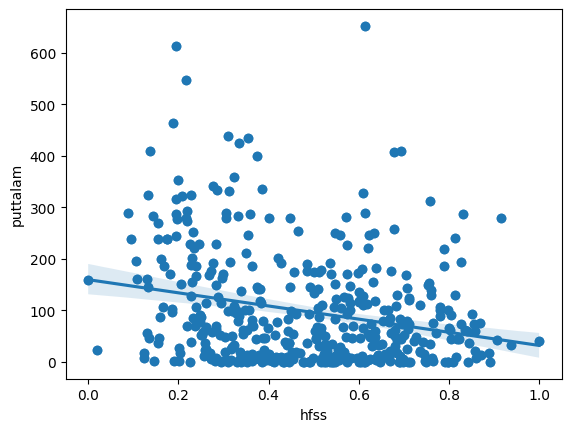

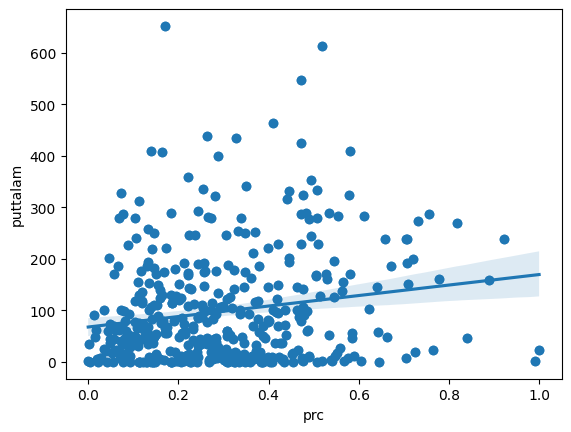

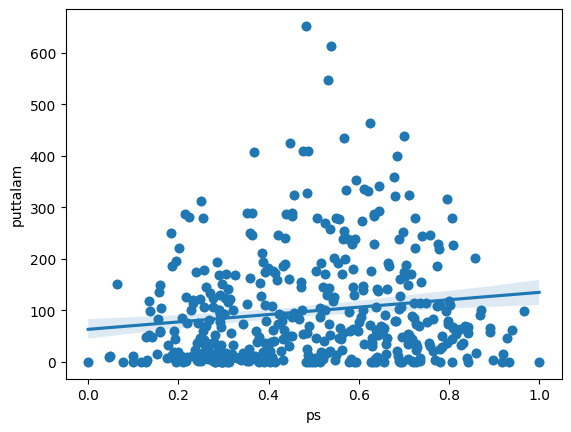

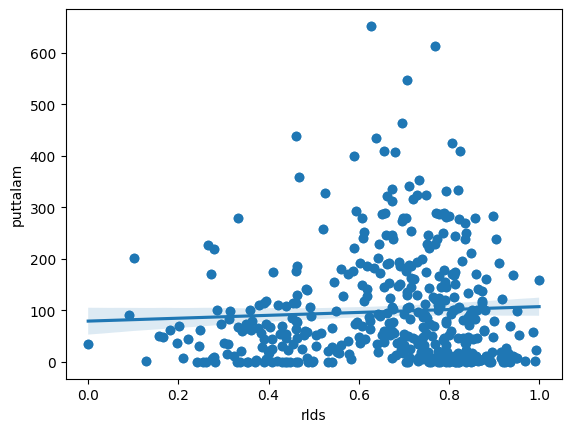

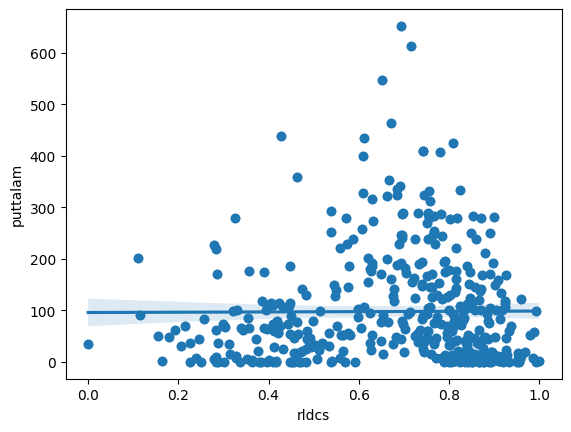

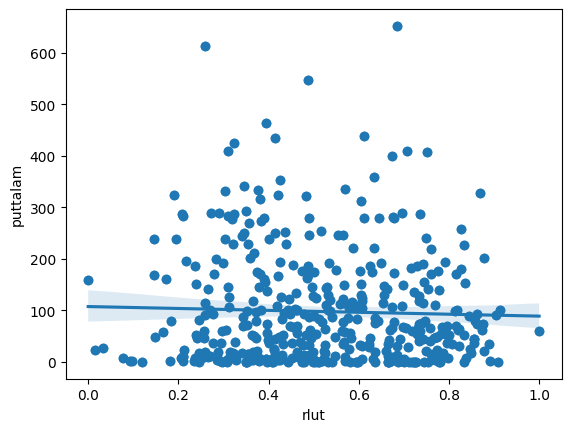

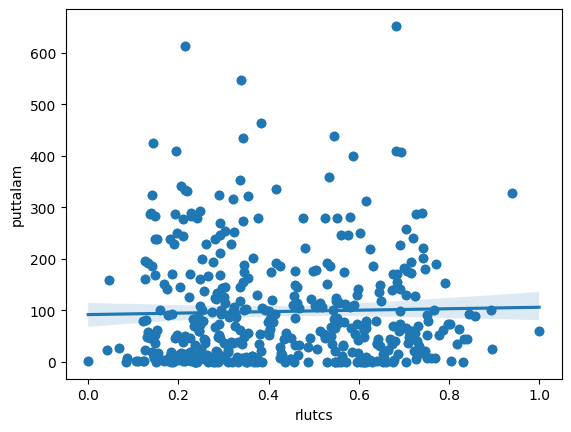

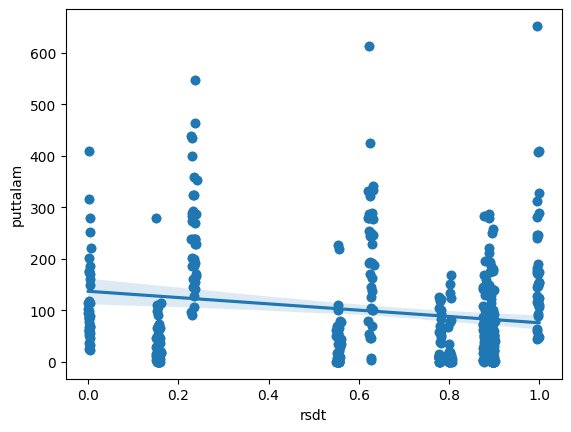

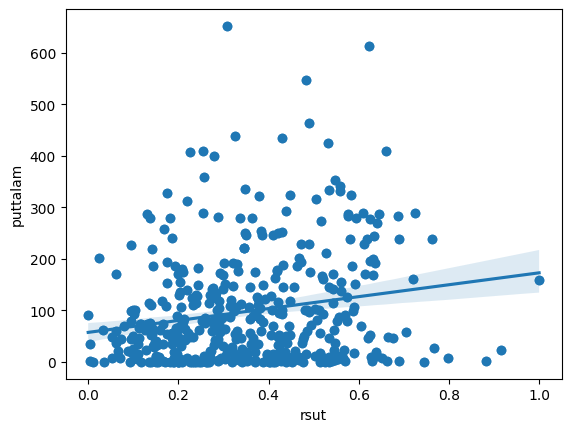

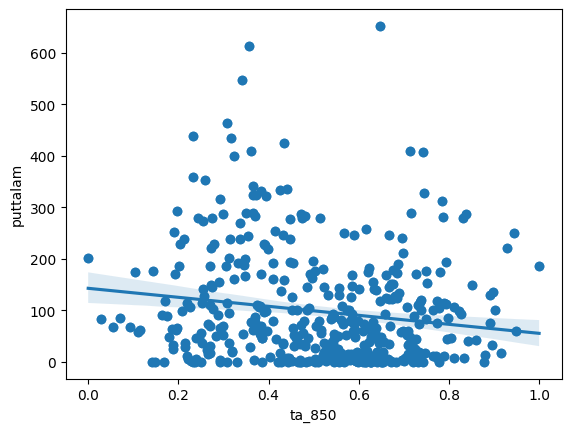

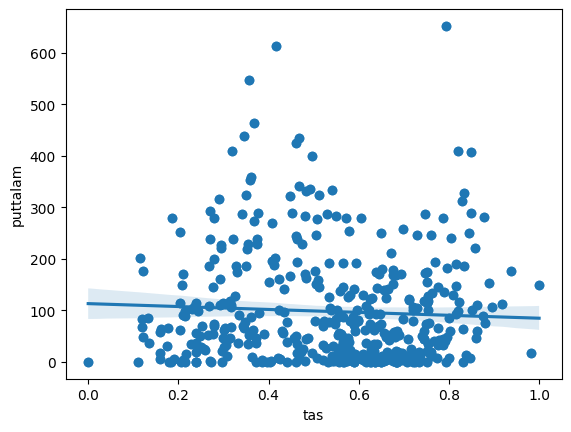

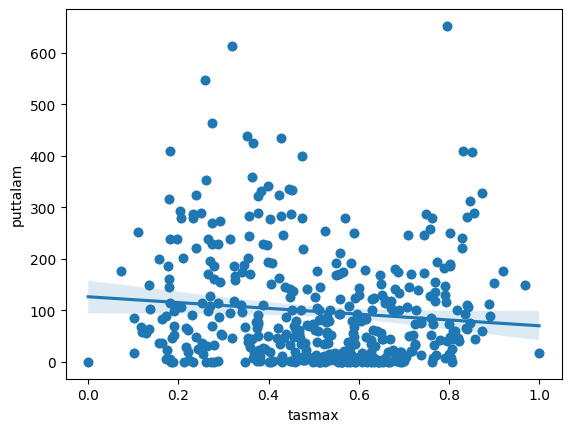

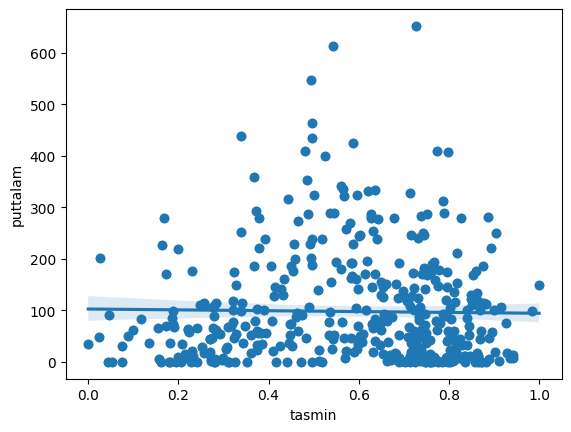

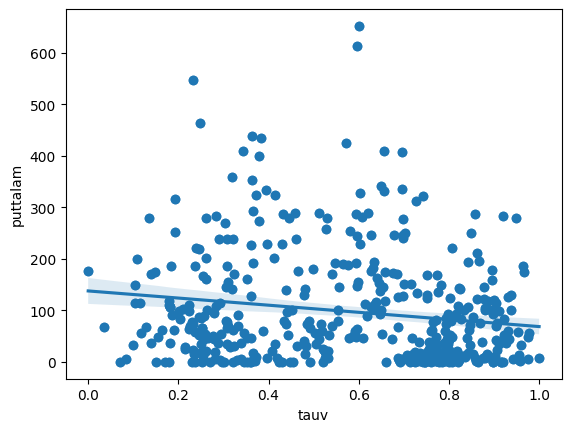

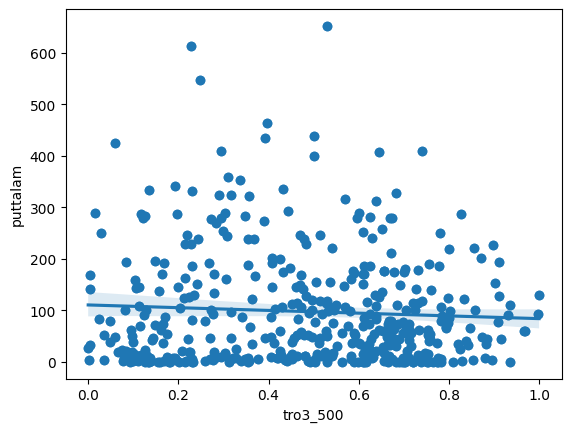

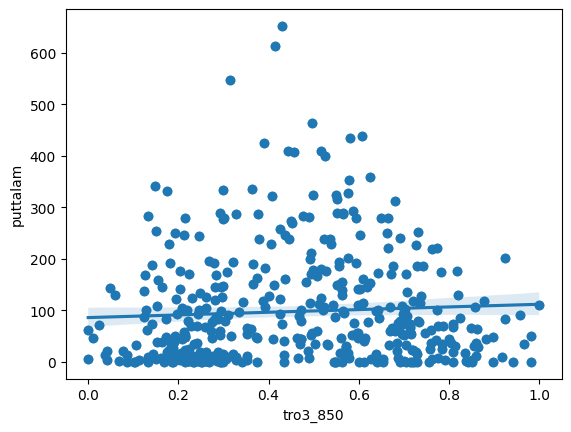

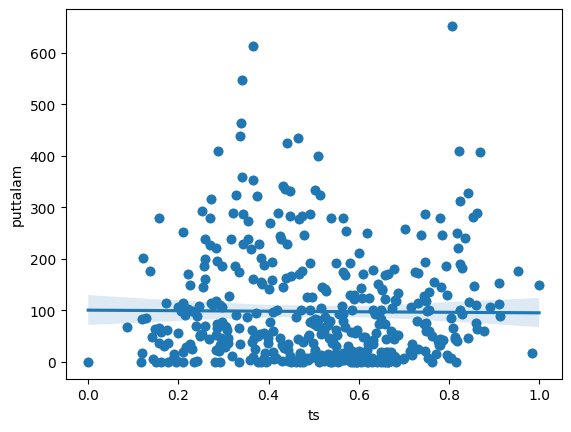

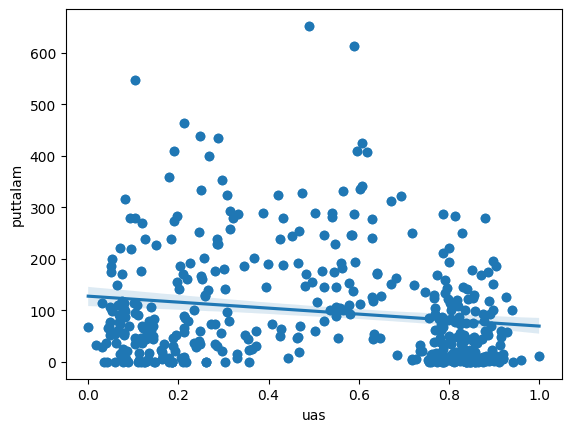

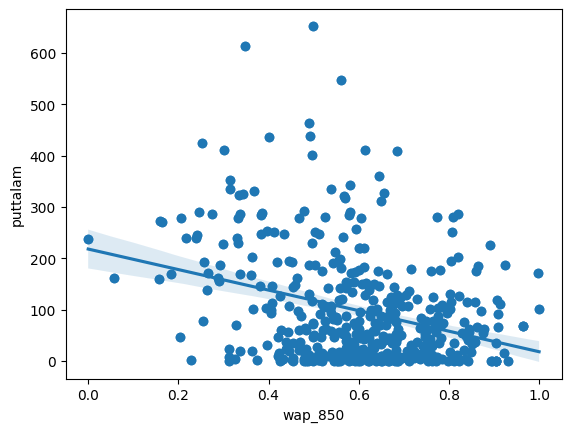

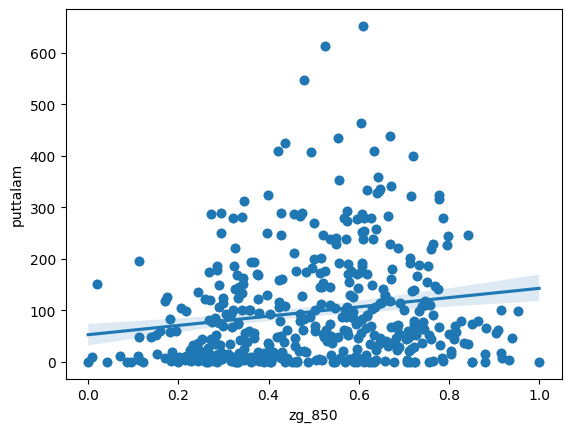

In [ ]:
# Identify the highly correlated attributes

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

for i in range(len(data.columns)):
      plt.scatter(data.iloc[:, i], data.puttalam)        #plotting quality vs each attributes of dataset
      plt.xlabel(data.columns[i])
      plt.ylabel('puttalam')
      sns.regplot(x=data.iloc[:, i],y=data.puttalam,data=data)
      plt.show()

In [ ]:
import matplotlib.pyplot as plt

imp = data.drop("puttalam", axis=1).apply(lambda x: x.corr(data.puttalam))
print(imp)
indices = np.argsort(imp)
print(indices)
print(imp[indices])     #Sorted in ascending order



tauu       -0.188389
rlus        0.007360
sfcWind    -0.320654
rsuscs      0.044539
rsus       -0.208198
rsdscs     -0.179362
prw        -0.025512
hurs        0.079746
rtmt       -0.295396
ua_850     -0.206126
evspsbl     0.003712
vas        -0.145872
clwvi       0.134455
rsutcs      0.041624
rsds       -0.241981
ua_500     -0.134057
va_850      0.009678
pr          0.171008
huss        0.004446
sbl         0.044378
zg_500      0.066841
wap_500    -0.139152
clt         0.029893
va_500     -0.057984
clivi       0.052004
ta_500     -0.013519
psl         0.143434
hfls        0.003661
hfss       -0.242427
prc         0.173727
ps          0.141465
rlds        0.051482
rldcs       0.005453
rlut       -0.034084
rlutcs      0.027398
rsdt       -0.181520
rsut        0.188819
ta_850     -0.155512
tas        -0.051838
tasmax     -0.103560
tasmin     -0.017323
tauv       -0.160820
tro3_500   -0.060369
tro3_850    0.056365
ts         -0.009490
uas        -0.166360
wap_850    -0.316524
zg_850      0

In [ ]:
# Correlation matrix
# Calculate the correlation matrix
corr_matrix = data.corr()
print(corr_matrix)


          puttalam      tauu      rlus   sfcWind    rsuscs      rsus  \
puttalam  1.000000 -0.188389  0.007360 -0.320654  0.044539 -0.208198   
tauu     -0.188389  1.000000  0.593976  0.631727  0.019031 -0.098515   
rlus      0.007360  0.593976  1.000000  0.029210  0.239086  0.249760   
sfcWind  -0.320654  0.631727  0.029210  1.000000 -0.423309 -0.267878   
rsuscs    0.044539  0.019031  0.239086 -0.423309  1.000000  0.552303   
rsus     -0.208198 -0.098515  0.249760 -0.267878  0.552303  1.000000   
rsdscs   -0.179362  0.508179  0.726974 -0.063475  0.696353  0.541210   
prw      -0.025512  0.712083  0.267736  0.498748 -0.188129 -0.634353   
hurs      0.079746  0.338794 -0.232923  0.452077 -0.349500 -0.803772   
rtmt     -0.295396  0.774112  0.727442  0.272520  0.397618  0.397974   
ua_850   -0.206126  0.979105  0.514330  0.623208  0.021443 -0.156025   
evspsbl   0.003712  0.002721 -0.354815  0.621797 -0.449680 -0.310133   
vas      -0.145872  0.930272  0.767892  0.411863  0.197135  0.05

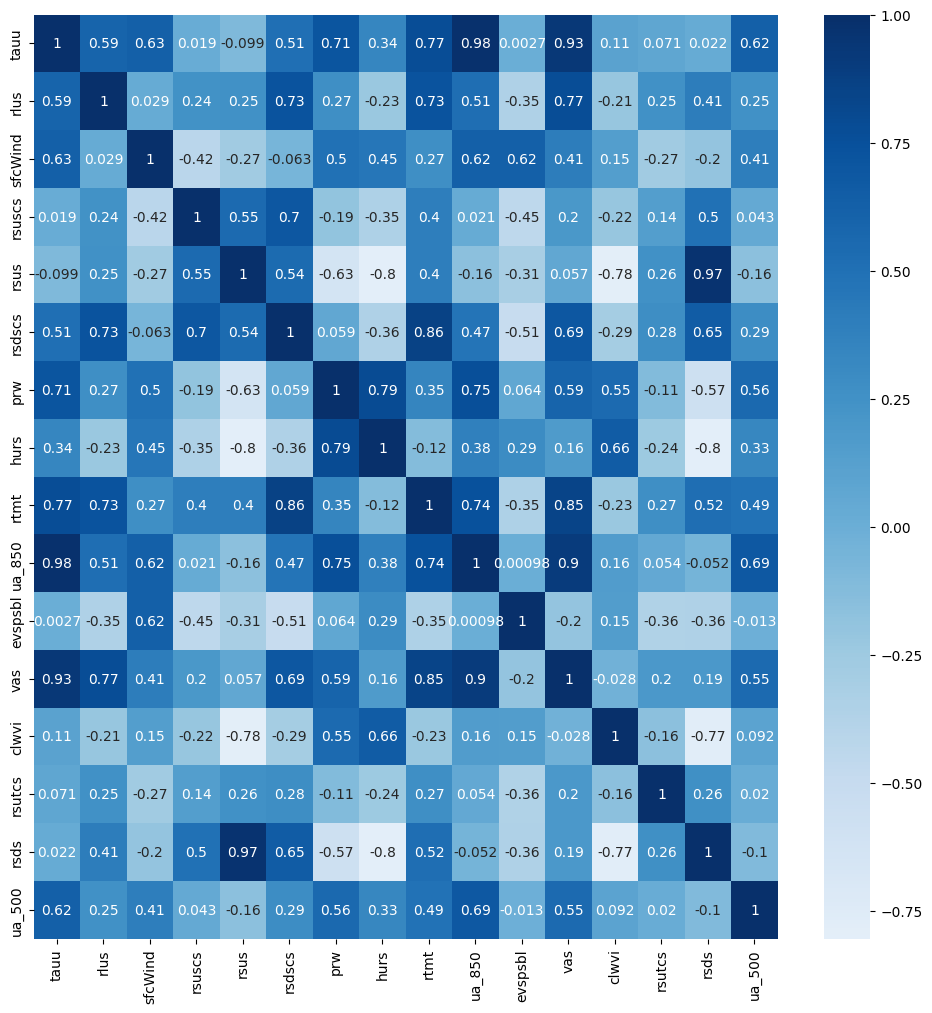

In [ ]:
# Correlation matrix
# Calculate the correlation matrix with subsets 

import seaborn as sns
import matplotlib.pyplot as plt

subset_features = ['tauu','rlus','sfcWind','rsuscs','rsus','rsdscs', 'prw', 'hurs','rtmt','ua_850','evspsbl','vas','clwvi', 'rsutcs', 'rsds','ua_500']

subset_corr_matrix = data[subset_features].corr()

plt.figure(figsize=(12, 12))
sns.heatmap(subset_corr_matrix, center=0, cmap='Blues', annot=True)
plt.show()





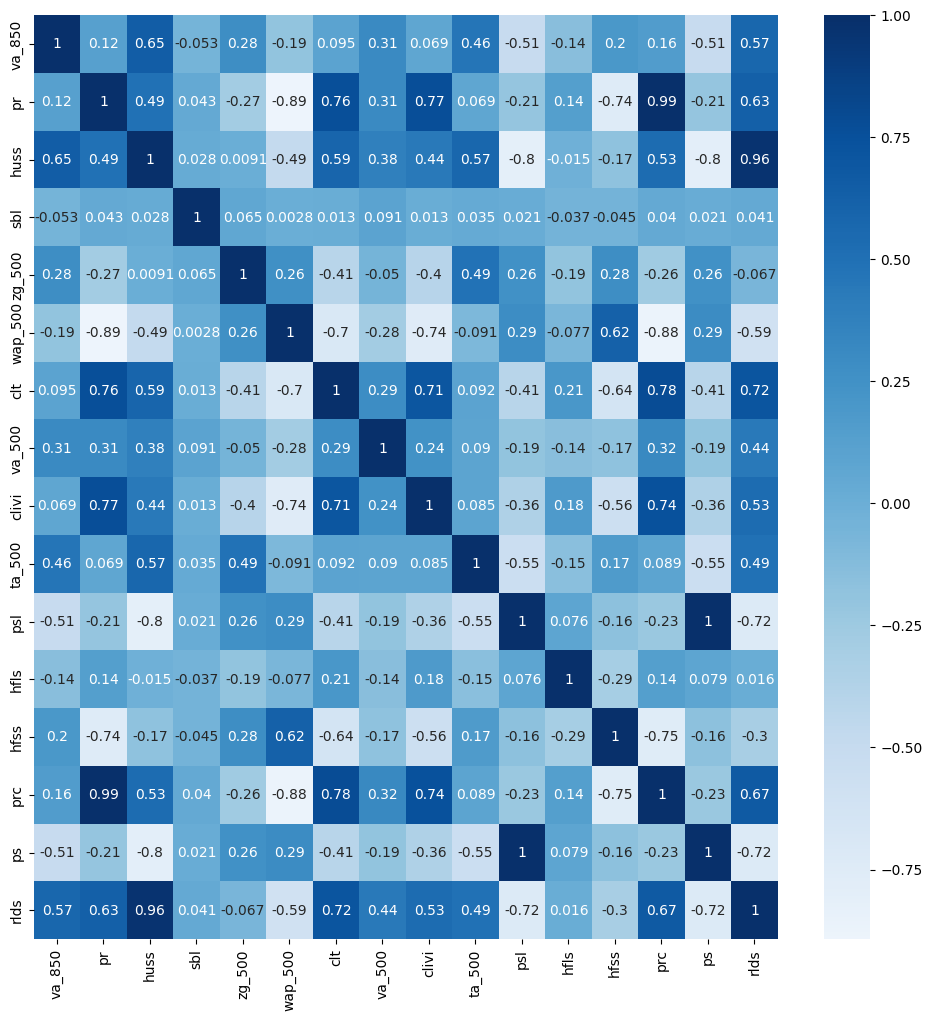

In [ ]:
# Correlation matrix
# Calculate the correlation matrix with subsets 

import seaborn as sns
import matplotlib.pyplot as plt

subset_features = ['va_850','pr','huss','sbl', 'zg_500', 'wap_500','clt','va_500','clivi','ta_500','psl', 'hfls', 'hfss','prc','ps','rlds']

subset_corr_matrix = data[subset_features].corr()

plt.figure(figsize=(12, 12))
sns.heatmap(subset_corr_matrix, center=0, cmap='Blues', annot=True)
plt.show()


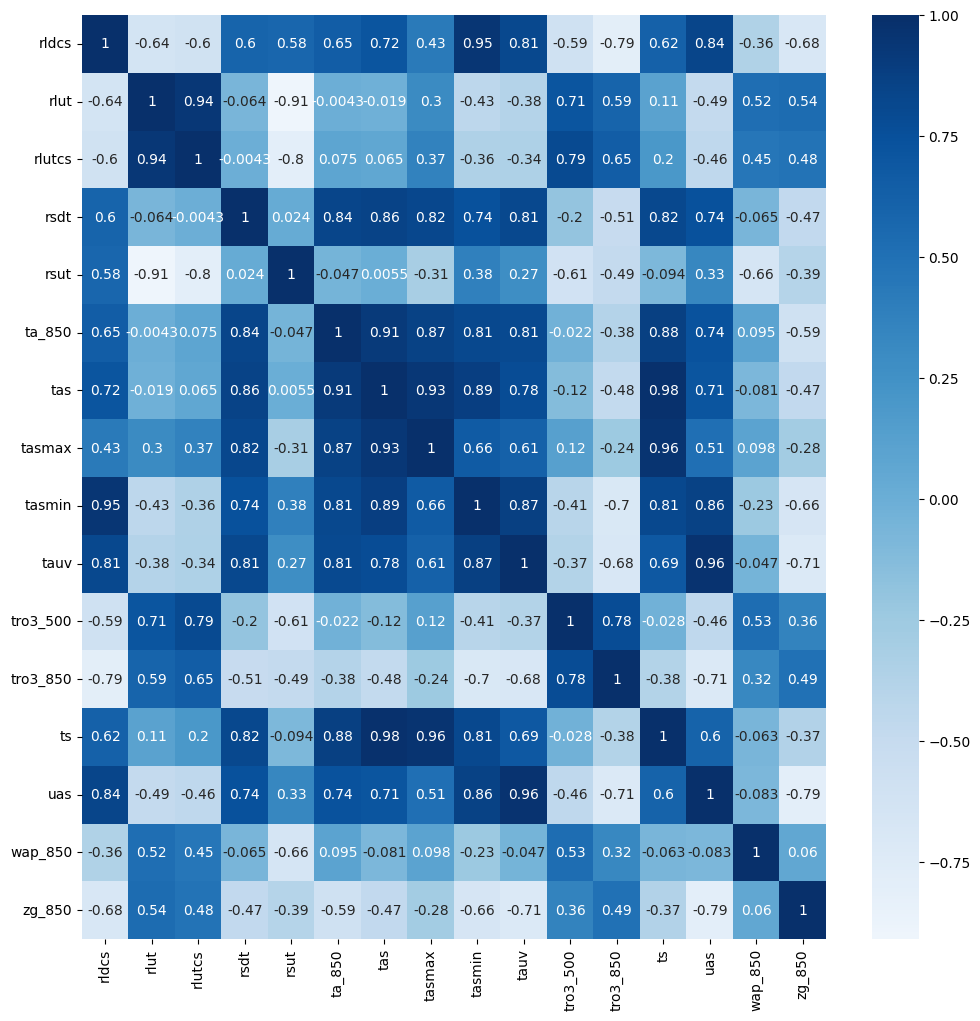

In [ ]:
# Correlation matrix
# Calculate the correlation matrix with subsets 

import seaborn as sns
import matplotlib.pyplot as plt

subset_features = ['rldcs','rlut', 'rlutcs', 'rsdt','rsut','ta_850','tas','tasmax','tasmin', 'tauv', 'tro3_500','tro3_850','ts','uas','wap_850','zg_850']

subset_corr_matrix = data[subset_features].corr()

plt.figure(figsize=(12, 12))
sns.heatmap(subset_corr_matrix, center=0, cmap='Blues', annot=True)
plt.show()


          puttalam      tauu   sfcWind    rsuscs      rsus      hurs  \
puttalam  1.000000 -0.188389 -0.320654  0.044539 -0.208198  0.079746   
tauu     -0.188389  1.000000  0.631727  0.019031 -0.098515  0.338794   
sfcWind  -0.320654  0.631727  1.000000 -0.423309 -0.267878  0.452077   
rsuscs    0.044539  0.019031 -0.423309  1.000000  0.552303 -0.349500   
rsus     -0.208198 -0.098515 -0.267878  0.552303  1.000000 -0.803772   
hurs      0.079746  0.338794  0.452077 -0.349500 -0.803772  1.000000   
rsutcs    0.041624  0.071269 -0.265295  0.144914  0.257996 -0.240828   
ua_500   -0.134057  0.621990  0.405251  0.042915 -0.158960  0.331448   
va_850    0.009678  0.567034  0.193690  0.250408 -0.004755  0.176573   
pr        0.171008  0.195118  0.166626 -0.199901 -0.854446  0.774901   
sbl       0.044378 -0.036080 -0.033641 -0.071762 -0.063270  0.032188   
zg_500    0.066841 -0.119528 -0.270287  0.187312  0.323136 -0.331486   
wap_500  -0.139152 -0.248467 -0.141928  0.124713  0.734346 -0.66

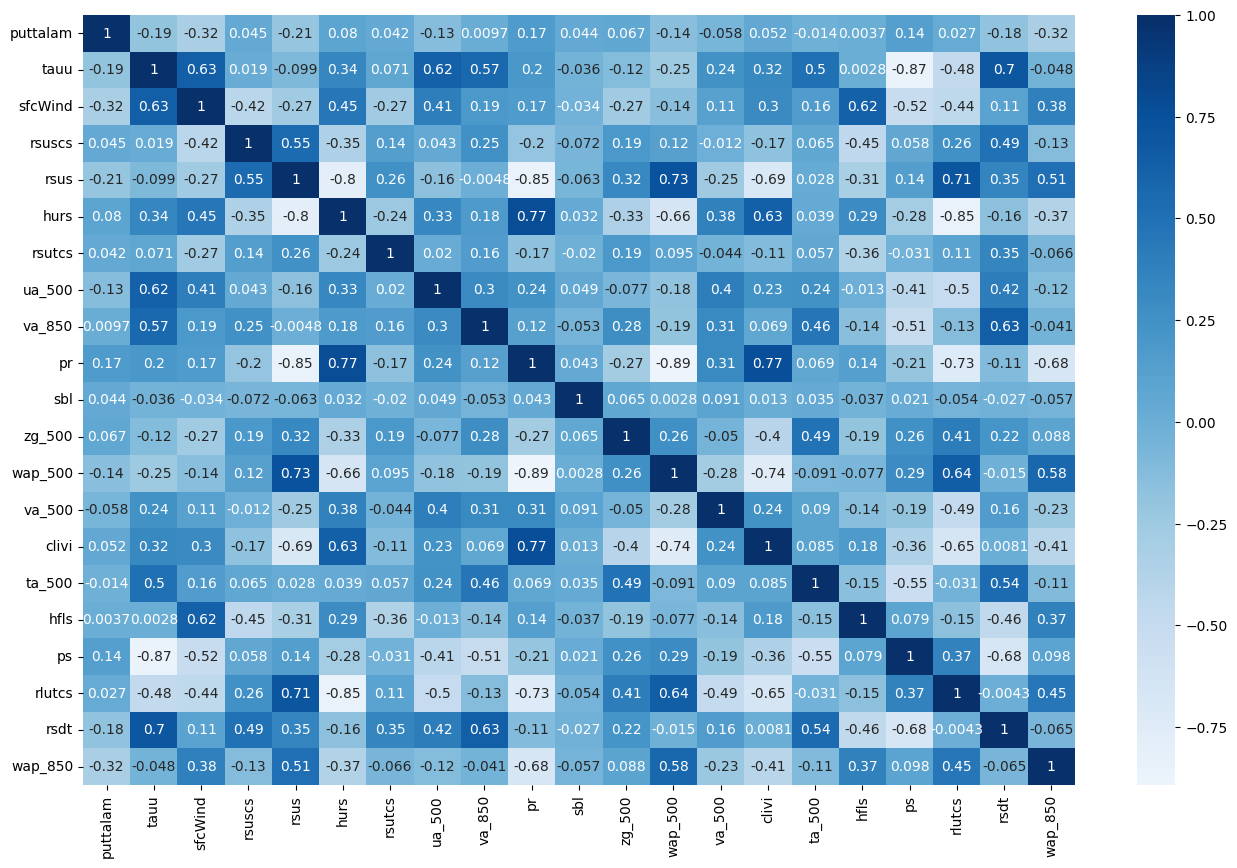

In [ ]:
# drop the highly correlated features

# from first subset
data = data.drop(['ua_850', 'vas', 'rsds', 'rtmt','prc','psl','huss','tasmin','tasmax','ta_850','tas','uas','tro3_850'],axis=1);

# from second subset
data = data.drop(['ts', 'evspsbl', 'tauv', 'rldcs','rlut','rsdscs','clwvi','clt','zg_850'],axis=1);

# from third subset
data = data.drop(['rlus', 'prw', 'rsut', 'rlds','hfss','tro3_500'],axis=1);

# Correlation matrix
# Calculate the correlation matrix
corr_matrix = data.corr()
print(corr_matrix)
plt.figure(figsize=(16, 10), dpi=100)
sns.heatmap(corr_matrix, center=0, cmap='Blues',annot=True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

imp = data.drop("puttalam", axis=1).apply(lambda x: x.corr(data.puttalam))
print(imp)
indices = np.argsort(imp)
print(indices)
print(imp[indices])     #Sorted in ascending order


# drop less correlated to puttalam data
data = data.drop(['hfls', 'va_850', 'ta_500', 'rlutcs','rsutcs'],axis=1);




tauu      -0.188389
sfcWind   -0.320654
rsuscs     0.044539
rsus      -0.208198
hurs       0.079746
rsutcs     0.041624
ua_500    -0.134057
va_850     0.009678
pr         0.171008
sbl        0.044378
zg_500     0.066841
wap_500   -0.139152
va_500    -0.057984
clivi      0.052004
ta_500    -0.013519
hfls       0.003661
ps         0.141465
rlutcs     0.027398
rsdt      -0.181520
wap_850   -0.316524
dtype: float64
tauu        1
sfcWind    19
rsuscs      3
rsus        0
hurs       18
rsutcs     11
ua_500      6
va_850     12
pr         14
sbl        15
zg_500      7
wap_500    17
va_500      5
clivi       9
ta_500      2
hfls       13
ps         10
rlutcs      4
rsdt       16
wap_850     8
dtype: int64
sfcWind   -0.320654
wap_850   -0.316524
rsus      -0.208198
tauu      -0.188389
rsdt      -0.181520
wap_500   -0.139152
ua_500    -0.134057
va_500    -0.057984
ta_500    -0.013519
hfls       0.003661
va_850     0.009678
rlutcs     0.027398
rsutcs     0.041624
sbl        0.044378
rsuscs     0

IndexError: ignored

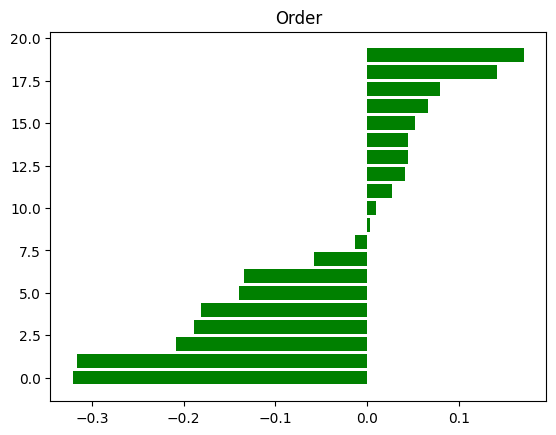

In [ ]:
names=['tauu','sfcWind','rsuscs','rsus', 'hurs','ua_500','pr','sbl', 'zg_500', 'wap_500','va_500','clivi','ta_500','ps', 'rsdt', 'wap_850']
plt.title('Order')

#Plotting horizontal bar graph
plt.barh(range(len(indices)), imp[indices], color='g', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()